In [1]:
import os
import logging
import numpy as np
from matplotlib import pyplot as plt
from photometry.NERSC.paths import *
from photometry import *

logger = logging.getLogger('EBV1000')
setup_logging()

run = 'north'
region = run[0].upper()
path_data = path_data(region)
path_randoms = path_randoms(region)
path_mctool = path_mctool(region)
path_legacysim = os.path.join(path_dir,'legacysim','dr9','ebv1000shaper',run,'file0_rs0_skip0','merged','matched_input.fits')

In [2]:
# legacysim
legacysim = Catalogue.load(path_legacysim)
legacysim = TargetSelection.load_objects(path_legacysim,radecbox=None,tracer='ELG',region=None)
legacysim.set_upper_case()
legacysim['RA'] = legacysim['INPUT_RA']
legacysim['DEC'] = legacysim['INPUT_DEC']
#legacysim['MATCHED'] = legacysim['DISTANCE'] < 0.15/3600.
logger.info('Found {:d}/{:d} matches.'.format(legacysim['MATCHED'].sum(),legacysim.size))
legacysim.set_estimated_flux(key='INPUT_EFLUX',key_transmission='INPUT_MW_TRANSMISSION',key_flux='INPUT_FLUX')
legacysim.set_estimated_flux(key='EFLUX',key_transmission='MW_TRANSMISSION',key_flux='FLUX')

def mask_ts(cat,key_flux,key_fiberflux):
    from desitarget.sv1.sv1_cuts import isELG_colors
    svgtot, svgfib, fdrgtot, fdrgfib = isELG_colors(gflux=cat['{}_G'.format(key_flux)],
                                                    rflux=cat['{}_R'.format(key_flux)],
                                                    zflux=cat['{}_Z'.format(key_flux)],
                                                    gfiberflux=cat['{}_G'.format(key_fiberflux)],
                                                    south=region=='S')
    return svgtot, svgfib, fdrgtot, fdrgfib

legacysim.set_estimated_flux(key='INPUT_EFLUX',key_transmission='INPUT_MW_TRANSMISSION',key_flux='INPUT_FLUX')
legacysim.set_estimated_flux(key='EFIBERFLUX',key_transmission='MW_TRANSMISSION',key_flux='FIBERFLUX')

mask_tsin = legacysim.mask_maskbit(key_nobs='INPUT_NOBS',key_maskbits='INPUT_MASKBITS') & mask_ts(legacysim,key_flux='INPUT_EFLUX',key_fiberflux='INPUT_EFLUX')[2]
mask_tsout = legacysim.mask_maskbit(key_nobs='NOBS',key_maskbits='MASKBITS') & mask_ts(legacysim,key_flux='EFLUX',key_fiberflux='EFIBERFLUX')[2] & legacysim['MATCHED']
logger.info('Selecting {:d} (output)/{:d} (input) injected sources.'.format(mask_tsout.sum(),mask_tsin.sum()))
legacysim_data = legacysim[mask_tsout]
legacysim_randoms = legacysim[mask_tsin]

mask_tsin = legacysim.mask_maskbit(key_nobs='INPUT_NOBS',key_maskbits='INPUT_MASKBITS') & mask_ts(legacysim,key_flux='INPUT_EFLUX',key_fiberflux='INPUT_EFLUX')[2]
mask_tsout = legacysim.mask_maskbit(key_nobs='NOBS',key_maskbits='MASKBITS') & mask_ts(legacysim,key_flux='EFLUX',key_fiberflux='EFIBERFLUX')[3] & legacysim['MATCHED']
logger.info('Selecting {:d} (output)/{:d} (input) injected sources.'.format(mask_tsin.sum(),mask_tsout.sum()))
legacysimfiber_data = legacysim[mask_tsout]
legacysimfiber_randoms = legacysim[mask_tsin]

[ 000000.01 ]: 01-22 16:58  Catalogue       INFO     Loading catalogue /global/cscratch1/sd/adematti/legacysim/dr9/ebv1000shaper/north/file0_rs0_skip0/merged/matched_input.fits.
[ 000000.60 ]: 01-22 16:58  Catalogue       INFO     Loading catalogue /global/cscratch1/sd/adematti/legacysim/dr9/ebv1000shaper/north/file0_rs0_skip0/merged/matched_input.fits.
[ 000001.15 ]: 01-22 16:58  TargetSelection INFO     Selecting 123182/123182 targets.
[ 000001.83 ]: 01-22 16:58  EBV1000         INFO     Found 107848/123182 matches.
[ 000002.15 ]: 01-22 16:58  EBV1000         INFO     Selecting 15414 (output)/14914 (input) injected sources.
[ 000002.49 ]: 01-22 16:58  EBV1000         INFO     Selecting 14914 (output)/14560 (input) injected sources.


[ 000002.81 ]: 01-22 16:58  Catalogue       INFO     Loading catalogue /global/cscratch1/sd/adematti/targets_ELG_dr9m/pixweight.fits.
[ 000002.88 ]: 01-22 16:58  HealpixDensity  INFO     Found in header (nside,nest) = (256,True).
[ 000002.88 ]: 01-22 16:58  HealpixDensity  INFO     Inferring brickid from randoms.
[ 000002.89 ]: 01-22 16:58  HealpixDensity  INFO     Found 1633 bricks with randoms.


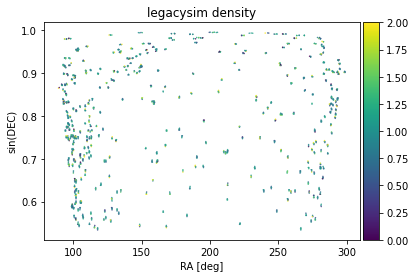

[ 000003.12 ]: 01-22 16:58  HealpixDensity  INFO     Found in header (nside,nest) = (256,True).
[ 000003.12 ]: 01-22 16:58  HealpixDensity  INFO     Inferring brickid from randoms.
[ 000003.12 ]: 01-22 16:58  HealpixDensity  INFO     Found 1633 bricks with randoms.
[ 000003.22 ]: 01-22 16:58  Properties      INFO     Calculating EBV statistics.
[ 000003.26 ]: 01-22 16:58  HealpixDensity  INFO     Fraction of randoms not included in EBV plot: 0.1965.
[ 000003.27 ]: 01-22 16:58  Properties      INFO     Calculating EBV statistics.
[ 000003.31 ]: 01-22 16:58  HealpixDensity  INFO     Fraction of randoms not included in EBV plot: 0.1965.
[ 000003.32 ]: 01-22 16:58  Properties      INFO     Calculating GALDEPTH_G statistics.
[ 000003.35 ]: 01-22 16:58  HealpixDensity  INFO     Fraction of randoms not included in GALDEPTH_G plot: 0.1991.
[ 000003.36 ]: 01-22 16:58  Properties      INFO     Calculating GALDEPTH_G statistics.
[ 000003.39 ]: 01-22 16:58  HealpixDensity  INFO     Fraction of ran

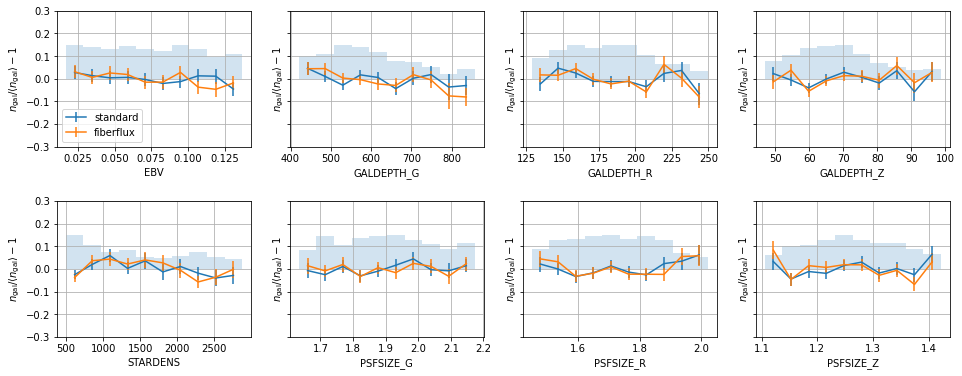

In [3]:
# Density maps
map = Catalogue.load(path_hp)
legacysim_dens = HealpixDensity(map=map)
legacysim_dens.set_randoms(randoms=legacysim_randoms)
legacysim_dens.set_properties()
legacysim_dens.set_data(data=legacysim_data)
legacysim_dens.plot_density_map(title='legacysim density',vmin=0,vmax=2)

legacysimfiber_dens = HealpixDensity(map=map)
legacysimfiber_dens.set_randoms(randoms=legacysimfiber_randoms)
legacysimfiber_dens.set_properties()
legacysimfiber_dens.set_data(data=legacysimfiber_data)

props = ['EBV'] + ['GALDEPTH_{}'.format(b) for b in legacysim_data.bands] + ['STARDENS'] +  ['PSFSIZE_{}'.format(b) for b in legacysim_data.bands]

others = [legacysimfiber_dens]
labels = ['standard','fiberflux']

fig,lax = plt.subplots(ncols=4,nrows=2,sharex=False,sharey=True,figsize=(16,6))
fig.subplots_adjust(hspace=0.4,wspace=0.2)
lax = lax.flatten()
for iax,prop in enumerate(props):
    legacysim_dens.plot_density_variations(ax=lax[iax],others=others,prop=prop,histos=[legacysim_dens],var_kwargs={'labels':labels if iax==0 else None},leg_kwargs={},xedges={'quantiles':[0.1,0.9]})
plt.show()

## No striking difference between standard cuts and fiberflux cuts. Let's look at fluxes.

[ 000071.19 ]: 01-22 17:00  EBV1000         INFO     Scatter standard 0.0960 1146.2671
[ 000071.20 ]: 01-22 17:00  EBV1000         INFO     Scatter fiber 0.1623 106.1506


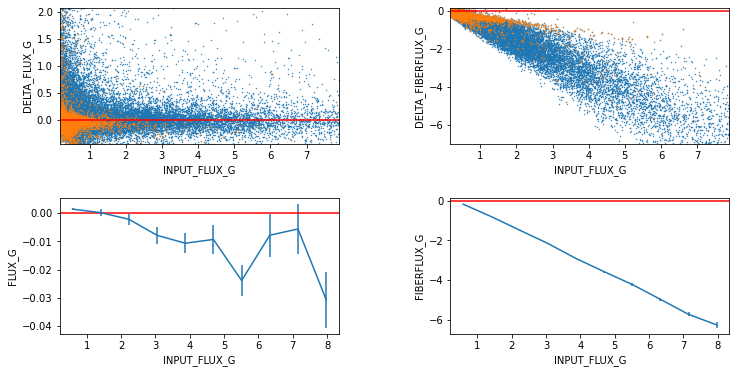

In [7]:
legacysim = legacysim[legacysim['MATCHED']]
from scipy import special,stats
def estimate_std(tab):
        return np.median(np.abs(tab-np.median(tab)))/(2.**0.5*special.erfinv(1./2.))

from photometry.utils import Binning

b = 'G'
for xlabel in ['INPUT_FLUX_{}'.format(b)]:
    fig,lax = plt.subplots(ncols=2,nrows=2,sharex=False,sharey=False,figsize=(12,6))
    fig.subplots_adjust(hspace=0.4,wspace=0.4)
    lax = lax.flatten()
    keys_flux = ['FLUX_{}'.format(b),'FIBERFLUX_{}'.format(b)]
    for ax,key in zip(lax,keys_flux):
        legacysim['DELTA_{}'.format(key)] = (legacysim[key]-legacysim['INPUT_FLUX_{}'.format(b)])/legacysim['MW_TRANSMISSION_{}'.format(b)]
        legacysim[(legacysim['INPUT_SHAPE_R'] > 0.)].plot_scatter(ax,prop1=xlabel,prop2='DELTA_{}'.format(key),xedges={'quantiles':[0.01,0.99]},yedges={'quantiles':[0.01,0.99]})
        legacysim[(legacysim['SHAPE_R'] == 0.) & (legacysim['INPUT_SHAPE_R'] > 0.)].plot_scatter(ax,prop1=xlabel,prop2='DELTA_{}'.format(key),xedges=None,yedges=None)
        ax.axhline(y=0,xmin=0,xmax=1,color='r')
    lax = lax[len(keys_flux):]
    for ax,key in zip(lax,keys_flux):
        xedges = Binning(samples=legacysim[xlabel],quantiles=[0.01,0.99]).edges
        x = (xedges[:-1] + xedges[1:])/2.
        y = stats.binned_statistic(legacysim[xlabel],legacysim['DELTA_{}'.format(key)],bins=xedges,statistic='median')[0]
        yerr = stats.binned_statistic(legacysim[xlabel],legacysim['DELTA_{}'.format(key)],bins=xedges,statistic=estimate_std)[0]
        counts = stats.binned_statistic(legacysim[xlabel],legacysim['DELTA_{}'.format(key)],bins=xedges,statistic='count')[0]
        yerr *= 1/counts**0.5 # trick to estimate standard deviation in presence of outliers
        ax.errorbar(x,y,yerr)
        ax.axhline(y=0,xmin=0,xmax=1,color='r')
        ax.set_xlabel(xlabel)
        ax.set_ylabel(key)

logger.info('Scatter standard {:.4f} {:.4f}'.format(estimate_std(legacysim['DELTA_FLUX_G']),np.std(legacysim['DELTA_FLUX_G'])))
logger.info('Scatter fiber {:.4f} {:.4f}'.format(estimate_std(legacysim['DELTA_FIBERFLUX_G']),np.std(legacysim['DELTA_FIBERFLUX_G'])))

## Let's correct for FIBERFLUX_G = f(FLUX_G)

[ 000006.70 ]: 01-22 16:59  EBV1000         INFO     Scatter standard 0.0960 1146.2671
[ 000006.71 ]: 01-22 16:59  EBV1000         INFO     Scatter fiber 0.1519 136.3984


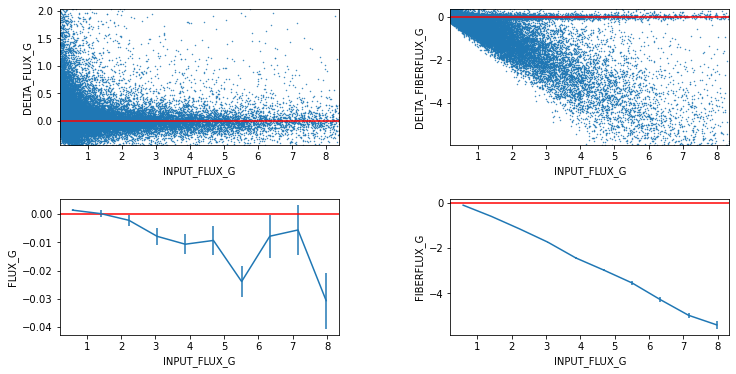

In [5]:
for xlabel in ['INPUT_FLUX_{}'.format(b)]:
    fig,lax = plt.subplots(ncols=2,nrows=2,sharex=False,sharey=False,figsize=(12,6))
    fig.subplots_adjust(hspace=0.4,wspace=0.4)
    lax = lax.flatten()
    keys_flux = ['FLUX_{}'.format(b),'FIBERFLUX_{}'.format(b)]
    for ax,key in zip(lax,keys_flux):
        legacysim['DELTA_{}'.format(key)] = (legacysim[key]-legacysim['INPUT_FLUX_{}'.format(b)])/legacysim['MW_TRANSMISSION_{}'.format(b)]
        if 'FIBER' in key: legacysim['DELTA_{}'.format(key)] = (1.285*legacysim[key]-legacysim['INPUT_FLUX_{}'.format(b)])/legacysim['MW_TRANSMISSION_{}'.format(b)]
        legacysim.plot_scatter(ax,prop1=xlabel,prop2='DELTA_{}'.format(key),xedges={'quantiles':[0.01,0.99]},yedges={'quantiles':[0.01,0.99]})
        ax.axhline(y=0,xmin=0,xmax=1,color='r')
    lax = lax[len(keys_flux):]
    for ax,key in zip(lax,keys_flux):
        xedges = Binning(samples=legacysim[xlabel],quantiles=[0.01,0.99]).edges
        x = (xedges[:-1] + xedges[1:])/2.
        y = stats.binned_statistic(legacysim[xlabel],legacysim['DELTA_{}'.format(key)],bins=xedges,statistic='median')[0]
        yerr = stats.binned_statistic(legacysim[xlabel],legacysim['DELTA_{}'.format(key)],bins=xedges,statistic=estimate_std)[0]
        counts = stats.binned_statistic(legacysim[xlabel],legacysim['DELTA_{}'.format(key)],bins=xedges,statistic='count')[0]
        yerr *= 1/counts**0.5 # trick to estimate standard deviation in presence of outliers
        ax.errorbar(x,y,yerr)
        ax.axhline(y=0,xmin=0,xmax=1,color='r')
        ax.set_xlabel(xlabel)
        ax.set_ylabel(key)

logger.info('Scatter standard {:.4f} {:.4f}'.format(estimate_std(legacysim['DELTA_FLUX_G']),np.std(legacysim['DELTA_FLUX_G'])))
logger.info('Scatter fiber {:.4f} {:.4f}'.format(estimate_std(legacysim['DELTA_FIBERFLUX_G']),np.std(legacysim['DELTA_FIBERFLUX_G'])))